<a href="https://colab.research.google.com/github/jamilalm/Machine-Learning-Project/blob/master/Marketing_Campaign_for_Banking_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Marketing Campaign for Banking Products:**
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

**AIM:**

> To predict the likelihood of a liability customer buying personal loans.

> To increase the success ratio of marketing Campaign with a minimum budget.

>To build the best predictive model to set up a new marketing campaign and sell more personal loan products to bank customers.







# Step 1: Importing required Libraries and dataset

In [1]:
# Importing required libraries
import numpy as np                  # For mathematical calculations
import pandas as pd                 # For data processing, csv file dataset I/O
import seaborn as sns               # For data visualization
import matplotlib.pyplot as plt     # For plotting graphs
%matplotlib inline                 
import warnings                     # To ignore any warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importing dataset
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [3]:
import io
dataset=pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

In [4]:
# To display top 5 rows of the dataset
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# To display bottom 5 rows of the dataset
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
# To display columns in the dataset
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
# To replace all the spaced column names with underscore
dataset.columns =[i.replace(' ','_') for i in dataset.columns]
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

**Data Description - 14 Features:**

*   **ID** - Customer ID

*   **Age** - Customer's age for completed years

* **Experience** - Number of years of professional experience

*  **Income** - Annual Income of the customer
*   **ZIP_Code** - Home address ZIP Code


*   **Family** - Family size of the customer

*   **CCAvg** - Average spending on Credit Cards per month($000)  

*   **Education** - Educational Level: 1. Undergrad, 2. Graduate, 3. Advanced/Professional

*  **Mortgage** - Value of house mortgage if any($000)
*   **Personal_Loan** - Did the customer accept the personal loan offered in the last campaign?

*   **Securities_Account** - Does the customer have a securities account with the bank? 

*   **CD_Account** - Does the customer have a Certificate of Deposit (CD) account with the bank?
*   **Online** - Does the customer use internet banking facilities?

*  **CreditCard** - Does the customer uses a credit card issued by UniversalBank?



> **Personal_Loan is our Target Variable (Dependent variable)**, all other 13 features are independent variables.

**Different Categories of dataset:**

*   Binary variables - Personal_Loan, Securities_Account, CD_Account, Online, CreditCard

*   Interval variables - Age, Experience, Income, CCAvg, Mortgage
*   Ordinal categorical variables - Family, Education


*   Nominal categorical variables - ID, ZIP_Code





















## Step 1.1: Checking the datatype and basic statistical summary

In [8]:
# To display datatypes of the dataset
dataset.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP_Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

Inference:

> The dataset contains datatypes int and float




In [9]:
# To display missing values of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Inference:

> All columns of the dataset are non-null (i.e.) There is no null values in the dataset





In [10]:
# To display Summary stats of dataset which include count, mean, std, min, max, etc.
dataset.describe().transpose()
# Printing the transpose of the dataset so that all the columns can be seen without scrolling right

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Inference:

> Here it is seen that minimum value of Experience column is -3.0 which could be a mistake because Experience cannot be negative. So we should clean this in data cleaning part.



In [11]:
# To display shape of the dataset
dataset.shape

(5000, 14)

Inference:

> In this dataset there are 5000 rows and 14 columns



In [12]:
# To display missing values of each column
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Inference:

> There are no null values in the dataset



# Step 2: Cleaning the data of irrelevant columns

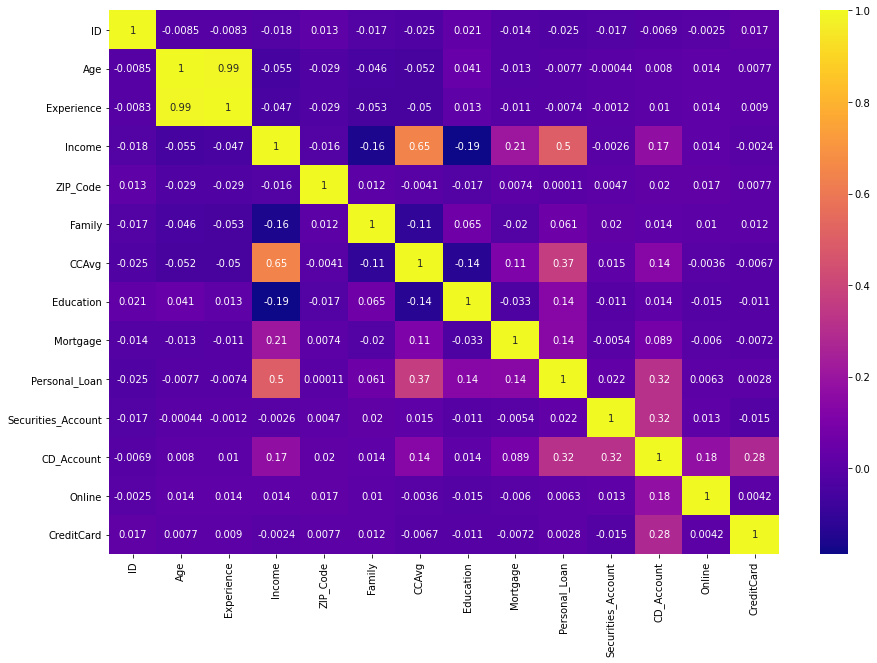

In [13]:
# To display the correlation between each columns in the dataset
fig,ax = plt.subplots(figsize = (15,10))
sns.heatmap(dataset.corr(),cmap = 'plasma', annot=True)

In [14]:
# To find correlation between Age and Experience
Experience=dataset['Experience']
Age=dataset['Age']
correlation=Experience.corr(Age)
print(correlation)

0.9942148569683321


Observation:

> From statistical summary, it is seen that experience column contains faulty data as some values are negative. We can replace those negative values with median but since Age and Experience are very strongly correlated, it is fine to go with Age and drop Experience to avoid multi-colinearity issue. 





> In machine learning model, it is necessary to seperate signal from the noise. Hence ID column which doesn't have any signal is also being dropped. 



In [15]:
# Dropping irrelevant columns
dataset = dataset.drop(['ID','Experience'],axis=1 )
dataset


,Age,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


# Step 3: EDA (Exploratory Data Analysis)

## Step 3.1: Number of unique in each column

In [16]:
# To display number of unique elements in each column 
dataset.nunique()

Age                    45
Income                162
ZIP_Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

Inference:

> ZIP_Code which is a nominal categorical variable has 467 distinct values with too many levels. Hence, it's better to drop ZIP_Code column from the dataset.



In [17]:
# Dropping ZIP_Code column
dataset = dataset.drop('ZIP_Code', axis = 1)
dataset

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


## Step 3.2: Number of people with zero mortgage

In [18]:
(dataset['Mortgage'] == 0).sum()

3462

Inference:

> There are 3462 people with zero mortgage out of 5000 (making it skewed)



## Step 3.3: Number of people with zero credit card spending per month

In [19]:
(dataset.CCAvg== 0).sum()

106

Inference:

> There are 106 people with zero average credit card spending per month



## Step 3.4: Value counts of all categorical columns

In [20]:
dataset.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

In [21]:
# To display value counts of all categorical columns
for column in dataset.columns:
  print("\n" + column)
  print(dataset[column].value_counts())


Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

Income
44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

CCAvg
0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Mortgage
0      3462
98       17
103  

## Step 3.5: Univariate Analysis and Multivariate analysis

### **Univariate Analysis**


[]

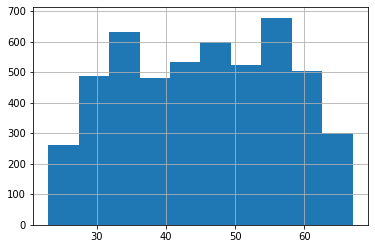

In [22]:
# Histogram plot of Age
dataset.Age.hist()
plt.plot()

Observation:

> Majority of customers fall between 30 and 60 years



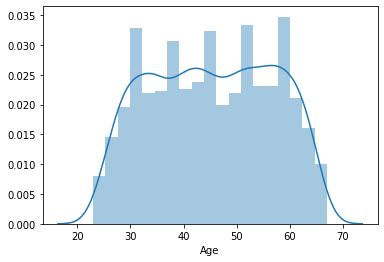

In [23]:
# Distribution plot of Age column
sns.distplot(dataset.Age)

Observation:

> Age column seems to have **Symmetric distribution**



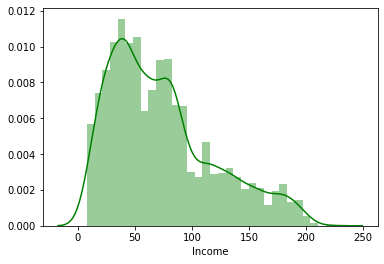

In [24]:
# Distribution plot of Income column 
sns.distplot(dataset.Income,color='g')

Observation:

> Income column seems to have **right skewed distribution**



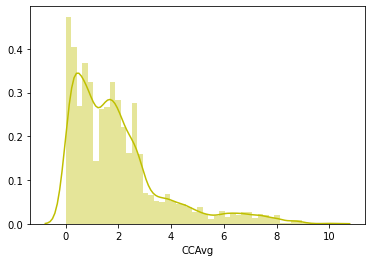

In [25]:
# Distribution plot of Credit Card Average column
sns.distplot(dataset.CCAvg,color = 'y')

Observation:

> Credit Card Average column seems to have **right skewed distribution**



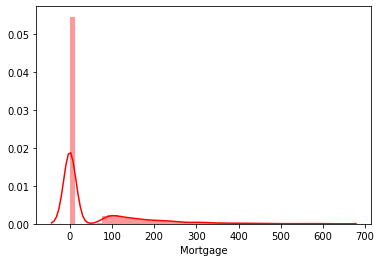

In [26]:
# Distribution plot of Mortgage column
sns.distplot(dataset.Mortgage,color = 'r')

Observation:

>Mortage column seems to have **highly skewed** 



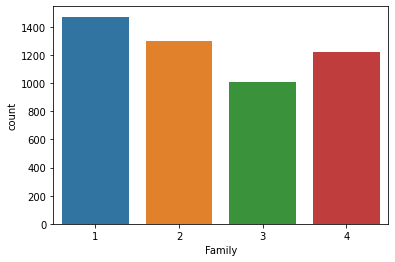

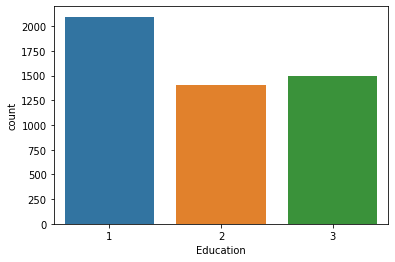

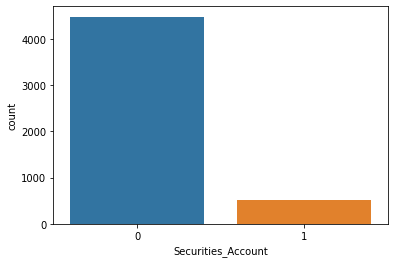

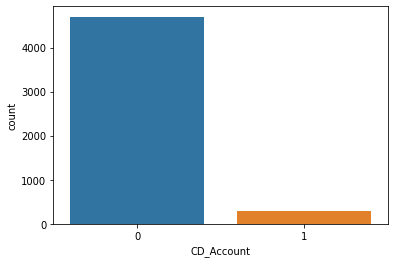

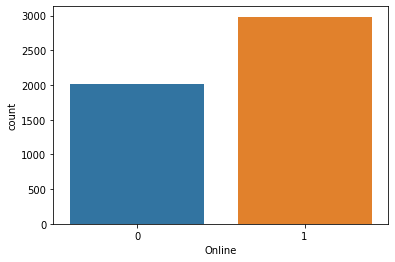

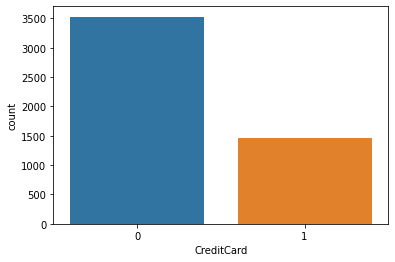

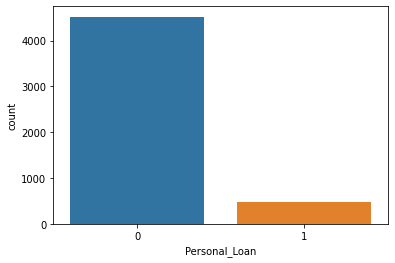

In [27]:
# Count plot of categorical columns
categorical_features = ['Family','Education','Securities_Account','CD_Account','Online','CreditCard','Personal_Loan']
for category in categorical_features:
    sns.countplot(dataset[category])
    plt.show()

Observation:

> Very few customers have Securities account or CD account. (< 500)

> Majority of the customers do not own Credit Cards as well. (>3500)

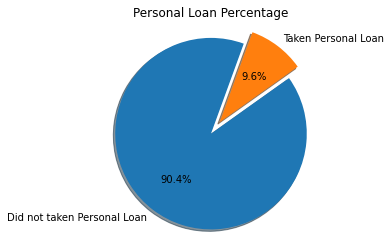

In [28]:
# Pie chart of Personal loan percentage
tempDF = pd.DataFrame(dataset['Personal_Loan'].value_counts()).reset_index()
fig,ax = plt.subplots()
ax.pie(tempDF['Personal_Loan'],explode = (0, 0.15),labels=['Did not taken Personal Loan','Taken Personal Loan'],
       autopct = '%1.1f%%', shadow = True, startangle = 70)
ax.axis('equal')   # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Personal Loan Percentage')
plt.show()

Observation:

> Only 9.6 % of the total customers bought the personal loan in the previous campaign and rest 90.4 % did not avail personal loan.

> Hence, we can clearly see that there is a high amount of class imbalance in the target attribute.






### **Multivariate analysis**

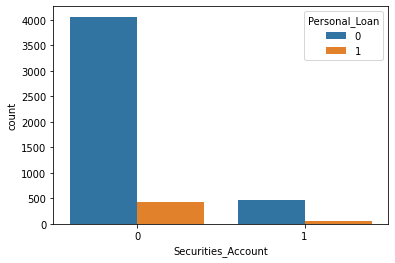

In [29]:
# Count plot of relation between Securities_Account and Personal_Loan
sns.countplot(x=dataset.Securities_Account, hue=dataset.Personal_Loan)

Observation:

>Majority of people who does not have Personal loan have Securities Account


Text(0.5, 1.0, 'Income vs Personal_Loan')

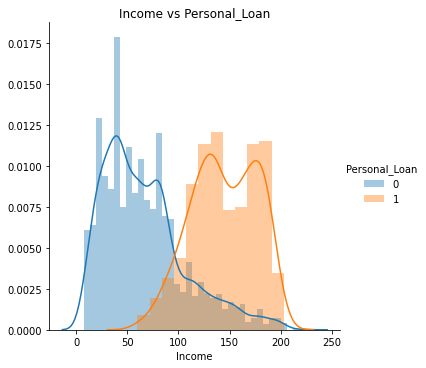

In [30]:
# Distribution plot 
sns.FacetGrid(dataset, hue='Personal_Loan',height=5).map(sns.distplot,'Income').add_legend()
plt.title('Income vs Personal_Loan')

Observation:

> Customers who have availed personal loan seems to have higher income than those who do not have personal loan





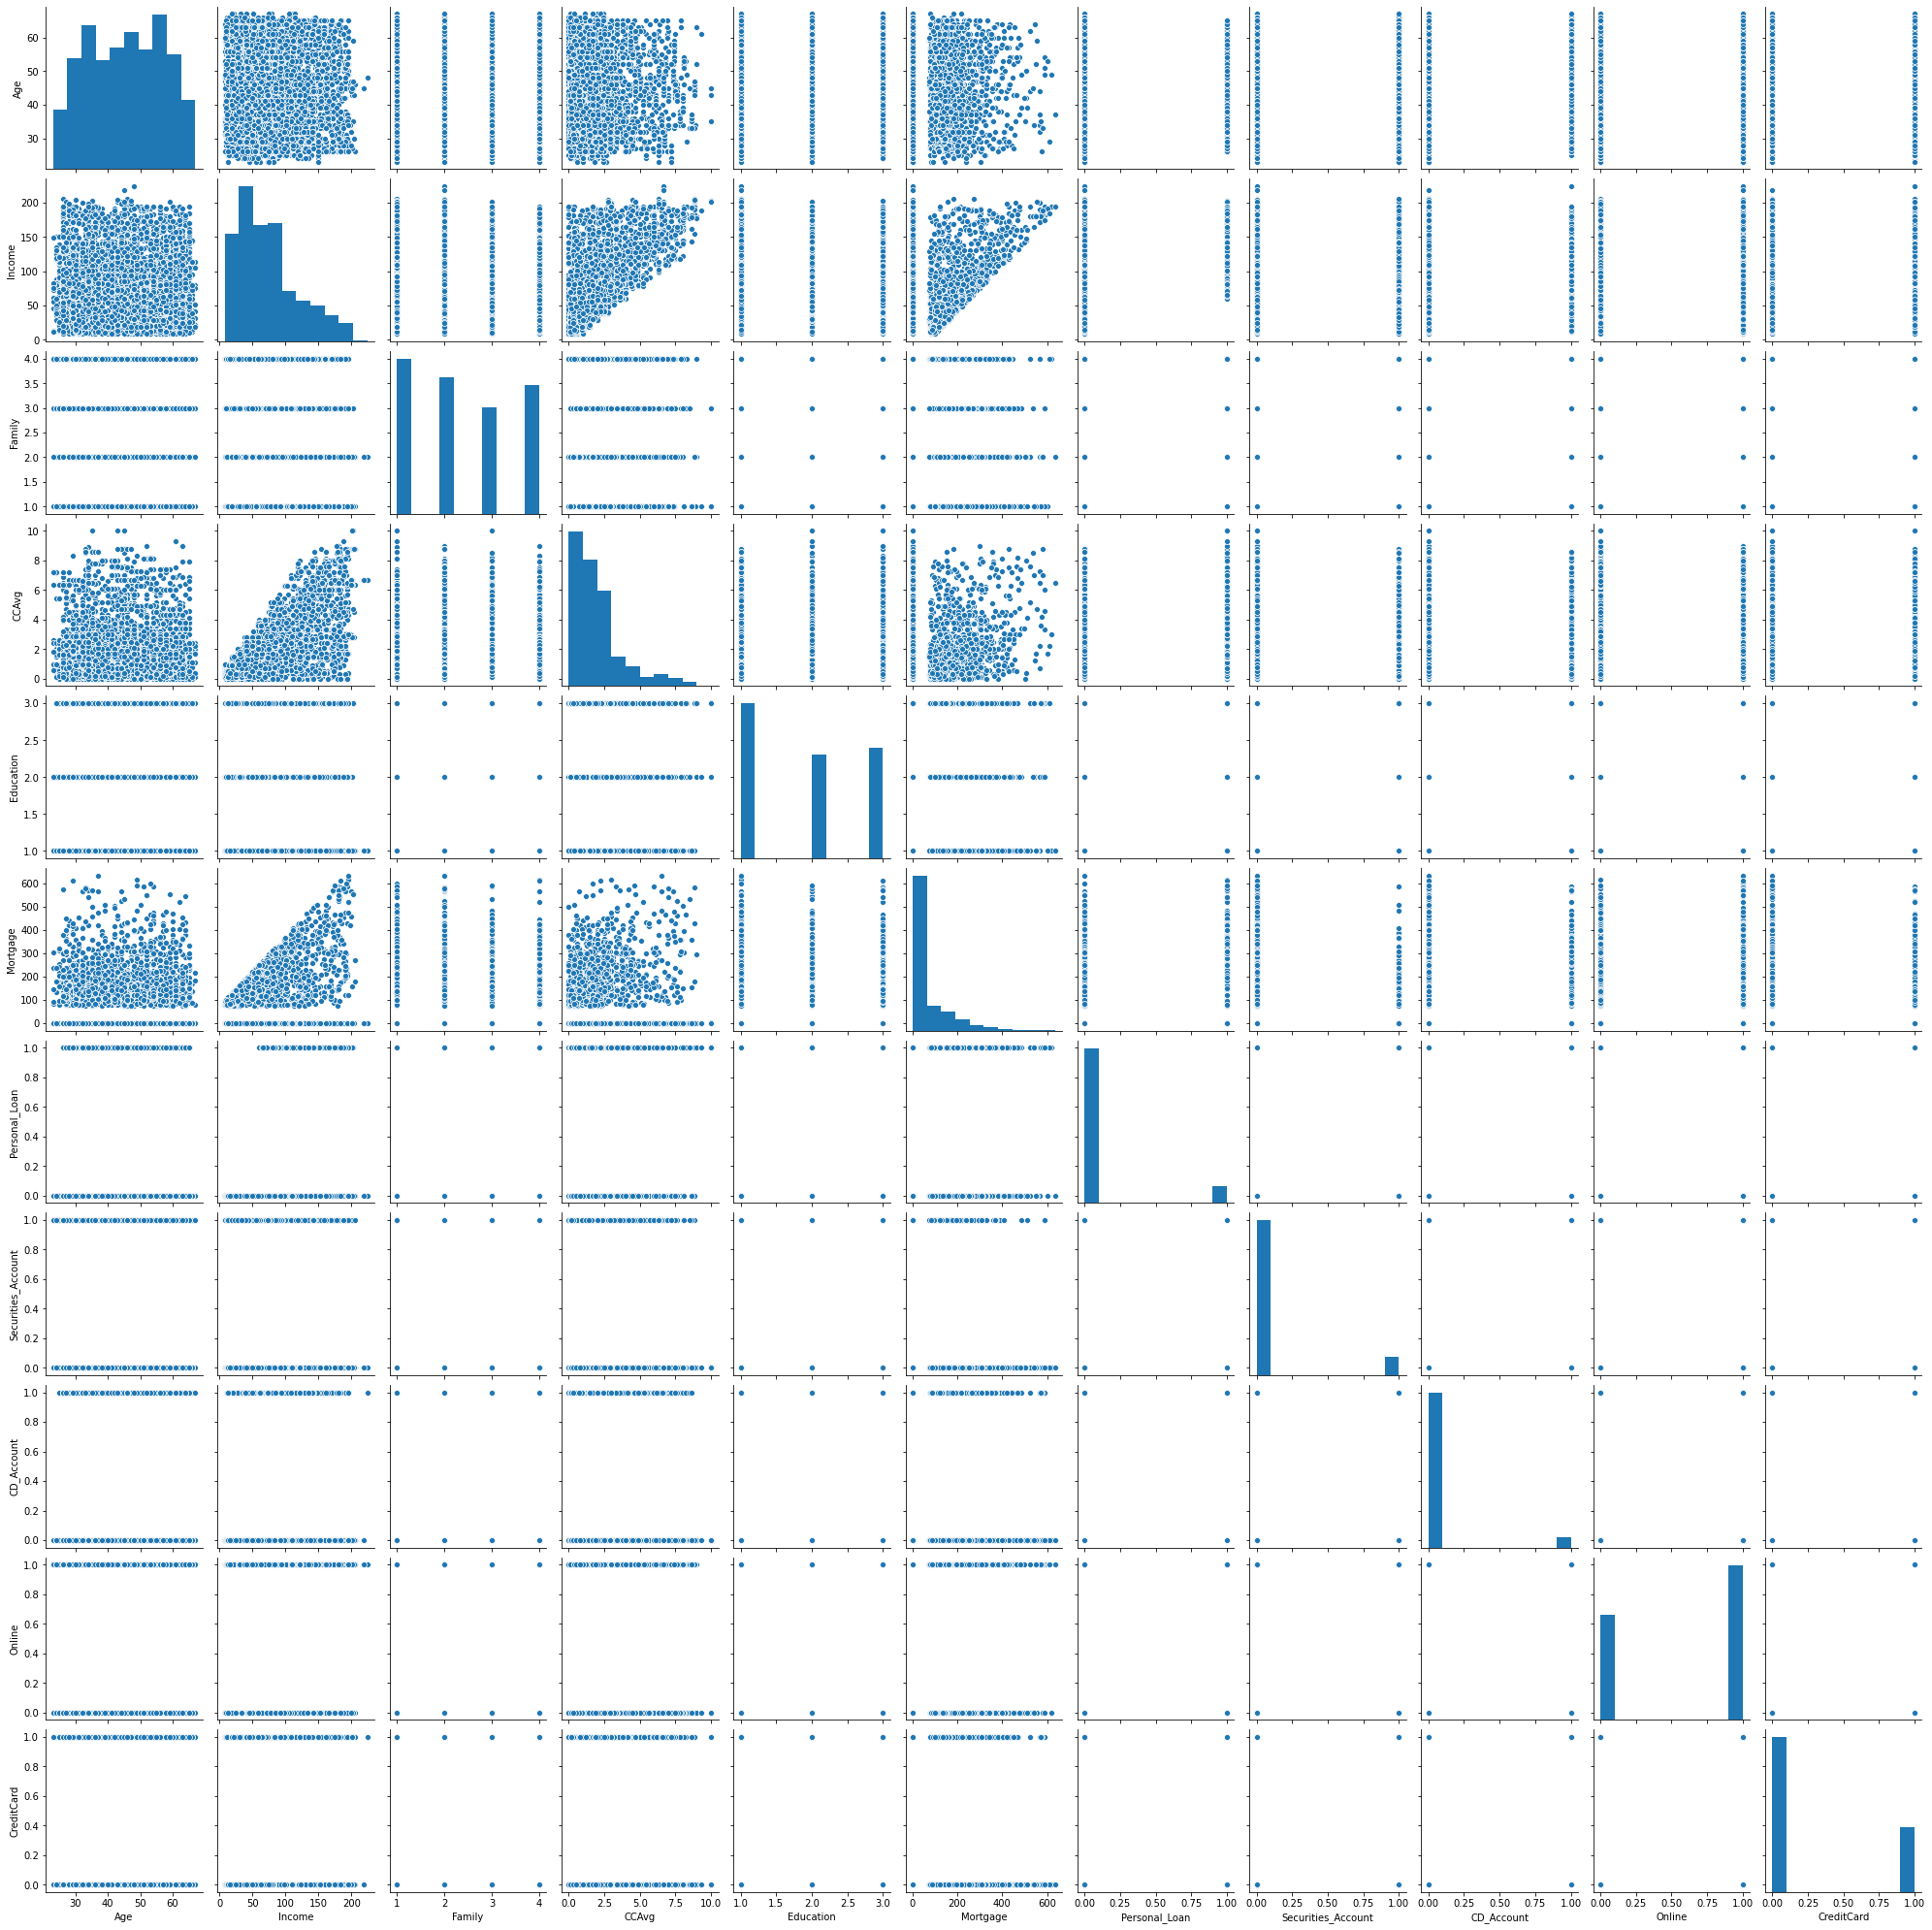

In [31]:
# Pairplot of all varaibles and their relationship with all other variables
sns.pairplot(dataset)

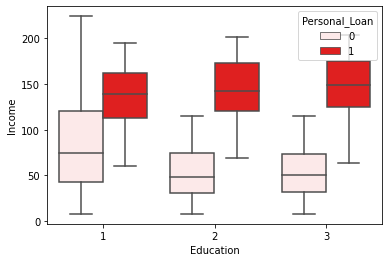

In [32]:
# Box plot of Education, Income against Personal_Loan
sns.boxplot(x=dataset.Education, y=dataset.Income, hue=dataset.Personal_Loan, color='r')

Observation: 

> Customers who has taken personal loan have same income levels irrespective of education level

> Customers who have availed personal loan seems to have higher income than those who do not have personal loan









Text(0.5, 1.0, 'Family vs Personal Loan')

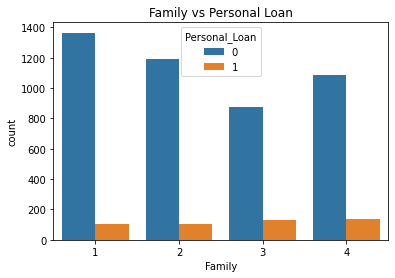

In [33]:
# Count plot of Family vs Personal_Loan
sns.countplot(x=dataset.Family, hue=dataset.Personal_Loan)
plt.title('Family vs Personal Loan')

Observation:

> Family size does not have any direct impact in personal loan. But it seems families with size of 3 are more likely to take loan.


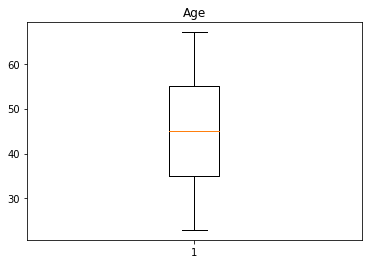

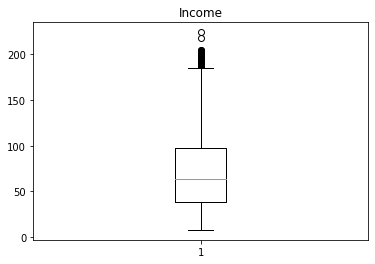

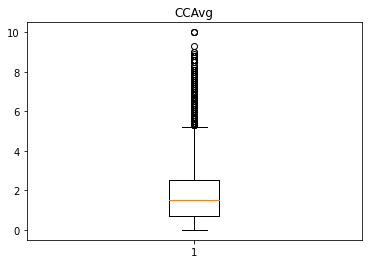

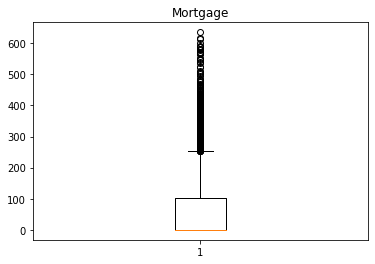

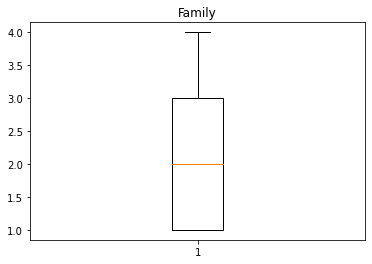

In [34]:
# Box plot of some variables to Detect Outliers
variables = ['Age','Income','CCAvg','Mortgage','Family']
for column in variables:
    plt.boxplot(dataset[column])
    plt.title(column)
    plt.show()

Observation:

> From the boxplot plotted,we found that our dataset contains outliers in Income, CCAvg and Mortgage columns, which has to be removed as they may affect the performance of the model.



# Step 4: Transformation of skewed Data

In [35]:
# Dividing features except Personal loan in variable X and Personal loan in variable Y
X = dataset.loc[:, dataset.columns != 'Personal_Loan']
Y = dataset['Personal_Loan']

To remove outliers and reduce skewness of Income and CCAvg columns, we use Power Transformation method and for Mortgage column, we use Quantile Transformer method.

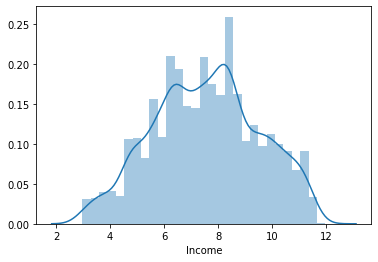

In [36]:
# Power Transformation method to reduce skewness in Income column
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson', standardize = False)
pt.fit(X.Income.values.reshape(-1,1))
temp = pt.transform(X.Income.values.reshape(-1,1))
X['Income'] = pd.Series(temp.flatten())
sns.distplot(X.Income)
plt.show()


[]

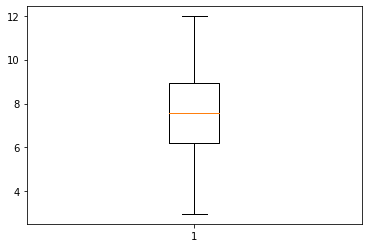

In [37]:
# Box plot of Income column after removing outliers
plt.boxplot(X['Income'])
plt.plot()

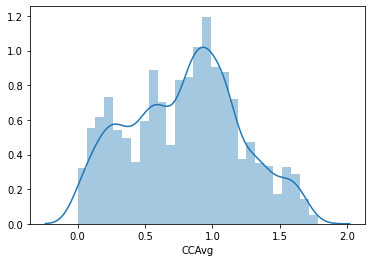

In [38]:
# Power Transformation method to reduce skewness in Income column
pt = PowerTransformer(method = 'yeo-johnson', standardize = False)
pt.fit(X.CCAvg.values.reshape(-1,1))
temp = pt.transform(X['CCAvg'].values.reshape(-1,1))
X['CCAvg'] = pd.Series(temp.flatten())
sns.distplot(X['CCAvg'])
plt.show()


[]

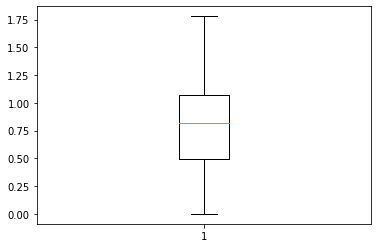

In [39]:
# Box plot of CCAvg column after removing outliers
plt.boxplot(X.CCAvg)
plt.plot()

In [40]:
# Quantile Transformer method to reduce skewness in Mortgage column
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
X['Mortgage_Int']=scaler.fit_transform(X['Mortgage'].values.reshape(-1,1))
X.drop('Mortgage', axis = 1, inplace = True)

Inference:

> Mortgage column after transformation is stored in variable Mortgage_Int and thus Mortgage column is dropped.



[]

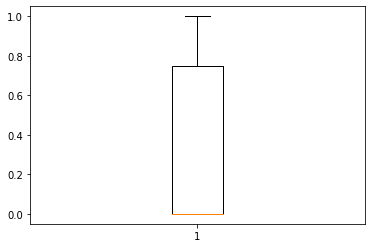

In [41]:
# Box plot of Mortgage_Int column after removing outliers
plt.boxplot(X.Mortgage_Int)
plt.plot()

In [42]:
# To display first 5 rows of X dataset
X.head()

,Age,Income,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard,Mortgage_Int
0,25,6.827583,4,0.845160,1,1,0,0,0,0.0
1,45,5.876952,3,0.814478,1,1,0,0,0,0.0
2,39,3.504287,1,0.633777,1,0,0,0,0,0.0
3,35,8.983393,1,1.107427,2,0,0,0,0,0.0
4,35,6.597314,4,0.633777,2,0,0,0,1,0.0


# Step 5: Splitting the dataset using stratified sampling

In [43]:
# Splitting the dataset as 70% train data and 30% test data using stratified sampling method
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify =Y, random_state = 0)
# To display shape of the splitted dataset
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3500, 10)
(1500, 10)
(3500,)
(1500,)


Inference:

> The dataset X and Y is splitted into 70% training data which contains 3500 rows of total dataset and 30% test data which contains 1500 rows.



In [44]:
# Resetting the dataframe
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
Y_train.reset_index(drop = True, inplace = True)
Y_test.reset_index(drop = True, inplace = True)

In [45]:
# To display first 5 rows of X_train
X_train.head()

,Age,Income,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard,Mortgage_Int
0,51,5.058173,3,0.322049,1,0,0,1,1,0.000000
1,64,5.948841,1,0.814478,2,1,0,0,0,0.000000
2,52,5.651776,4,0.902279,1,0,0,1,1,0.000000
3,32,4.661500,1,0.384645,3,0,0,1,0,0.752753
4,62,7.097040,1,0.544710,1,1,0,0,1,0.000000


In [46]:
# Normalising the dataset using sklearn's StandardScalar
from sklearn.preprocessing import StandardScaler
for ind, column in enumerate(X_train.columns):
  sc = StandardScaler()
  # Fit to train data
  sc.fit(X_train[[column]])
  # Transform train data
  np_array = sc.transform(X_train[[column]])
  X_train.loc[:][column] = pd.Series(np_array.flatten())
  # Transform test data
  np_array = sc.transform(X_test[[column]])
  X_test.loc[:][column] = pd.Series(np_array.flatten())

In [47]:
# Convert dataframes to numpy arrays
np_X_train = X_train.values
np_Y_train = Y_train.values
np_X_test = X_test.values
np_Y_test = Y_test.values

# Step 6: Using Logistic Regression Model and other classification algorithms and evaluating model performances

### **Predictive model 1 - Logistic Regression Model**

In [48]:
# Logistic Regression
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression
Logistic_Regression_Model = LogisticRegression(random_state = 0)
Logistic_Regression_Model.fit(np_X_train, np_Y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
print('Train Accuracy : ',Logistic_Regression_Model.score(np_X_train, np_Y_train))
print('Test Accuracy : ',Logistic_Regression_Model.score(np_X_test, np_Y_test))
# Predict X_train and X_test
pred_lr_X_train = Logistic_Regression_Model.predict(np_X_train)
pred_lr_X_test = Logistic_Regression_Model.predict(np_X_test)


Train Accuracy :  0.9565714285714285
Test Accuracy :  0.9533333333333334


In [50]:
# Accuracy of logistic regression model
lr_train_acc_score = accuracy_score(np_Y_train,pred_lr_X_train)
print(lr_train_acc_score)
lr_test_acc_score = accuracy_score(np_Y_test,pred_lr_X_test)
print(lr_test_acc_score) 

0.9565714285714285
0.9533333333333334


In [51]:
# F1-score of logistic regression model
lr_f1_score = f1_score(np_Y_test,pred_lr_X_test)
print('f1 score: ',lr_f1_score)

# Recall score of Logistic Regression Model
lr_recall_score = recall_score(np_Y_test,pred_lr_X_test)
print('Recall: ',lr_recall_score)

# Precision score of Logistic Regression Model
lr_precision_score = precision_score(np_Y_test,pred_lr_X_test)
print('Precision: ',lr_precision_score)

# Receiver Operating Characteristic (ROC) Area Under Curve (AUC) score 
lr_roc_auc_score = roc_auc_score(np_Y_test,pred_lr_X_test)
print('ROC Area Under Curve: ',lr_roc_auc_score)

f1 score:  0.7265625000000001
Recall:  0.6458333333333334
Precision:  0.8303571428571429
ROC Area Under Curve:  0.815910766961652


In [52]:
# Function to get Confusion Matrix
def draw_cm(actual, predicted):
  cm = confusion_matrix(actual,predicted)
  sns.heatmap(cm, annot = True, fmt = 'g', cbar = False, xticklabels = [0,1], yticklabels = [0,1])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
plt.show()

None


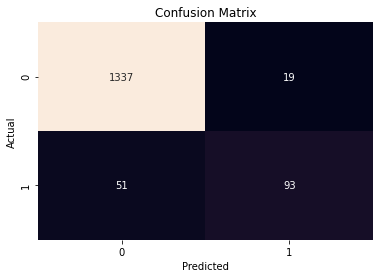

In [53]:
# Confusion Matrix of logistic regression model
print(draw_cm(np_Y_test, pred_lr_X_test.reshape(-1,1)))

*   True Negative (TN) - The case was negative and predicted negative

*   False Positive (FP) [Type I error] - The case was negative and predicted positive 
*   False Negative (FN) [Type II error] - The case was positive and predicted negative

*   True Positive (TP) - The case was positive and predicted positive



From Confusion Matrix of Logistic Regression Model,

> TN = 1337

> FP = 19

> FN = 51

> TP = 93

1430 correct predictions and 70 incorrect predictions in total

In [54]:
# Classification Report of logistic regression model
print(classification_report(np_Y_test, pred_lr_X_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.65      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500




Precision: Accuracy of positive predictions

> Precision = TP/(TP + FP)

Recall: Fraction of positives that were correctly identified

> Recall = TP/(TP + FN)

F1 score: weighted harmonic mean of precision and recall

> F1 score = 2 * (recall * precision)/(recall + precision)

Support: number of actual occurences of the class in the dataset




















Inference:

> From Logistic Regression Model, the recall we could get was 64.5% with an accuracy of 95.6% for train data and 95.3% for test data.





### **Predictive Model 2 - Decision Tree Classifier**

In [55]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
Decision_Tree_Model = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 8)
Decision_Tree_Model.fit(X_train, Y_train)
print('Train Accuracy : ', Decision_Tree_Model.score(np_X_train, np_Y_train))
print('Test Accuracy : ', Decision_Tree_Model.score(np_X_test, np_Y_test))


Train Accuracy :  0.996
Test Accuracy :  0.978


In [56]:
# Predict X_test and save in variable Y_pred
pred_dt_X_train = Decision_Tree_Model.predict(np_X_train)
pred_dt_X_test = Decision_Tree_Model.predict(np_X_test)

In [57]:
# Accuracy of Decision Tree Model
dt_train_acc_score = accuracy_score(np_Y_train,pred_dt_X_train)
print(dt_train_acc_score)
dt_test_acc_score = accuracy_score(np_Y_test,pred_dt_X_test)
print(dt_test_acc_score)


0.996
0.978


In [58]:
# F1-score of Decision Tree model
dt_f1_score = f1_score(np_Y_test,pred_dt_X_test.round(2))
print('f1 score: ',dt_f1_score)

# Recall score of Decision Tree Model
dt_recall_score = recall_score(np_Y_test,pred_dt_X_test)
print('Recall: ',dt_recall_score)

# Precision score of Decision Tree Model
dt_precision_score = precision_score(np_Y_test,pred_dt_X_test)
print('Precision: ',dt_precision_score)

# Receiver Operating Characteristic (ROC) Area Under Curve (AUC) score 
dt_roc_auc_score = roc_auc_score(np_Y_test,pred_dt_X_test)
print('ROC Area Under Curve: ',dt_roc_auc_score)

f1 score:  0.8865979381443299
Recall:  0.8958333333333334
Precision:  0.8775510204081632
ROC Area Under Curve:  0.9412794985250739


None


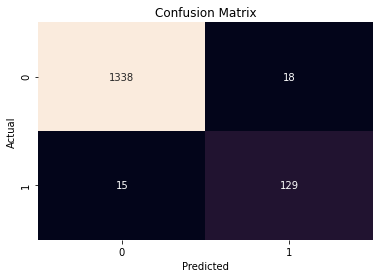

In [59]:
# Confusion Matrix of Decision Tree Model
print(draw_cm(np_Y_test, pred_dt_X_test.reshape(-1,1)))

In [60]:
# Classification of Decision Tree Model
print(classification_report(np_Y_test, pred_dt_X_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.88      0.90      0.89       144

    accuracy                           0.98      1500
   macro avg       0.93      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



Inference:

> From Decision Tree Model, the recall we could get was 89.5% with an accuracy of 99.6% for train data and 97.8% for test data.

> 1467 correct predictions and 33 incorrect predictions in total.





### **Predictive Model 3 - Random Forest Classifier**



In [61]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
Random_forest_Model = RandomForestClassifier(max_depth = 8, n_estimators = 500, random_state = 0 )
Random_forest_Model.fit(np_X_train,np_Y_train)
print('Train Accuracy : ', Random_forest_Model.score(np_X_train, np_Y_train))
print('Test Accuracy : ', Random_forest_Model.score(np_X_test, np_Y_test))

Train Accuracy :  0.9951428571428571
Test Accuracy :  0.988


In [62]:
# Predict X_test and save in variable Y_pred
pred_rf_X_train = Random_forest_Model.predict(np_X_train)
pred_rf_X_test = Random_forest_Model.predict(np_X_test)

In [63]:
# Accuracy of Random Forest Model
rf_train_acc_score = accuracy_score(np_Y_train,pred_rf_X_train)
print(rf_train_acc_score)
rf_test_acc_score = accuracy_score(np_Y_test,pred_rf_X_test)
print(rf_test_acc_score)

0.9951428571428571
0.988


In [64]:
# F1-score of Random Forest Model
rf_f1_score = f1_score(np_Y_test,pred_rf_X_test.round(2))
print('f1 score: ',rf_f1_score)

# Recall score of Random Forest Model
rf_recall_score = recall_score(np_Y_test,pred_rf_X_test)
print('Recall: ',rf_recall_score)

# Precision score of Random Forest Model
rf_precision_score = precision_score(np_Y_test,pred_rf_X_test)
print('Precision: ',rf_precision_score)

# Receiver Operating Characteristic (ROC) Area Under Curve (AUC) score 
rf_roc_auc_score = roc_auc_score(np_Y_test,pred_rf_X_test)
print('ROC Area Under Curve: ',rf_roc_auc_score)

f1 score:  0.9343065693430657
Recall:  0.8888888888888888
Precision:  0.9846153846153847
ROC Area Under Curve:  0.9437069813176008


None


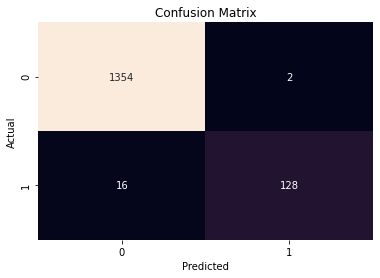

In [65]:
# Confusion Matrix of Random Forest Model
print(draw_cm(np_Y_test, pred_rf_X_test.reshape(-1,1),))

In [66]:
# Classification of Random Forest Model
print(classification_report(np_Y_test, pred_rf_X_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.89      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



Inference:

> From Random Forest Model, the recall we could get was 64.5% with an accuracy of 95.6% for train data and 95.3% for test data.

> 1482 correct predictions and 18 incorrect predictions in total.





### **Predictive Model 4 - Naive Bayes Classifier**

In [67]:
# For Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB 
Naive_Bayes_Model = GaussianNB()
Naive_Bayes_Model.fit(np_X_train, np_Y_train)
print('Train Accuracy : ', Naive_Bayes_Model.score(np_X_train, np_Y_train))
print('Test Accuracy : ', Naive_Bayes_Model.score(np_X_test, np_Y_test))

Train Accuracy :  0.9254285714285714
Test Accuracy :  0.928


In [68]:
# Predict X_test and save in variable Y_pred
pred_nb_X_train = Naive_Bayes_Model.predict(np_X_train)
pred_nb_X_test = Naive_Bayes_Model.predict(np_X_test)

In [69]:
# Accuracy of Naive Bayes Model
nb_train_acc_score = accuracy_score(np_Y_train,pred_nb_X_train)
print(nb_train_acc_score)
nb_test_acc_score = accuracy_score(np_Y_test,pred_nb_X_test)
print(nb_test_acc_score)

0.9254285714285714
0.928


In [70]:
# F1-score of Naive Bayes Model
nb_f1_score = f1_score(np_Y_test, pred_nb_X_test)
print('f1 score: ',nb_f1_score)

# Recall score of Naive Bayes Model
nb_recall_score = recall_score(np_Y_test,pred_nb_X_test)
print('Recall: ',nb_recall_score)

# Precision score of Naive Bayes Model
nb_precision_score = precision_score(np_Y_test,pred_nb_X_test)
print('Precision: ',nb_precision_score)

# Receiver Operating Characteristic (ROC) Area Under Curve (AUC) score 
nb_roc_auc_score = roc_auc_score(np_Y_test,pred_nb_X_test)
print('ROC Area Under Curve: ',nb_roc_auc_score)

f1 score:  0.5877862595419847
Recall:  0.5347222222222222
Precision:  0.652542372881356
ROC Area Under Curve:  0.7522431170108163


None


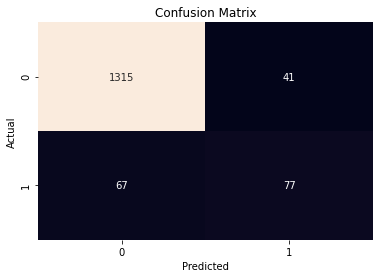

In [71]:
# Confusion Matrix of Naive Bayes Model
print(draw_cm(np_Y_test, pred_nb_X_test.reshape(-1,1)))

In [72]:
# Classification report of Naive Bayes Model
print(classification_report(np_Y_test, pred_nb_X_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1356
           1       0.65      0.53      0.59       144

    accuracy                           0.93      1500
   macro avg       0.80      0.75      0.77      1500
weighted avg       0.92      0.93      0.92      1500



Inference:

> From Naive Bayes Model, the recall we could get was 53.4% with an accuracy of 92.5% for train data and 92.8% for test data.

> 1392 correct predictions and 108 incorrect predictions in total.





### **Predictive Model 5 - KNN (K-Nearest Neighbor) Classifier**

In [73]:
# For K-NN Classifier
from sklearn.neighbors import KNeighborsClassifier 
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(np_X_train, np_Y_train)
print('Train Accuracy : ', KNN_Model.score(np_X_train, np_Y_train))
print('Test Accuracy : ', KNN_Model.score(np_X_test, np_Y_test))

Train Accuracy :  0.9548571428571428
Test Accuracy :  0.9406666666666667


In [74]:
# Predict X_test and save in variable Y_pred
pred_knn_X_train = Random_forest_Model.predict(np_X_train)
pred_knn_X_test = KNN_Model.predict(np_X_test)

In [75]:
# Accuracy of K-NN Model
knn_train_acc_score = accuracy_score(np_Y_train,pred_knn_X_train)
print(knn_train_acc_score)
knn_test_acc_score = accuracy_score(np_Y_test,pred_knn_X_test)
print(knn_test_acc_score)

0.9951428571428571
0.9406666666666667


In [76]:
# F1-score of K-NN Model
knn_f1_score = f1_score(np_Y_test,pred_knn_X_test)
print('f1 score: ',knn_f1_score)

# Recall score of K-NN classifier Model
knn_recall_score = recall_score(np_Y_test,pred_knn_X_test)
print('Recall: ',knn_recall_score)

# Precision score of K-NN Classifier Model
knn_precision_score = precision_score(np_Y_test,pred_knn_X_test)
print('Precision: ',knn_precision_score)

# Receiver Operating Characteristic (ROC) Area Under Curve (AUC) score
knn_roc_auc_score = roc_auc_score(np_Y_test,pred_knn_X_test)
print('ROC Area Under Curve: ',knn_roc_auc_score)

f1 score:  0.5700483091787439
Recall:  0.4097222222222222
Precision:  0.9365079365079365
ROC Area Under Curve:  0.7033861848574239


None


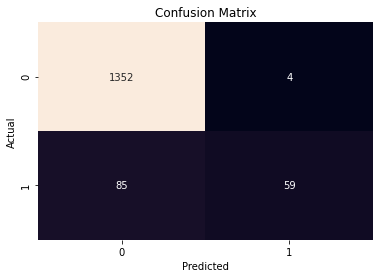

In [77]:
# Confusion matrix of K-NN Model
print(draw_cm(np_Y_test, pred_knn_X_test.reshape(-1,1),))

In [78]:
# Classification report of K-NN Model
print(classification_report(np_Y_test, pred_knn_X_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1356
           1       0.94      0.41      0.57       144

    accuracy                           0.94      1500
   macro avg       0.94      0.70      0.77      1500
weighted avg       0.94      0.94      0.93      1500



Inference:

> From K-NN Model, the recall we could get was 40.9% with an accuracy of 99.5% for train data and 94% for test data.

> 1411 correct predictions and 89 incorrect predictions in total.





### **Predictive Model 6 - Support Vector Machine**

In [79]:
# For svm classifier
from sklearn import svm
SVM_Model = svm.SVC(gamma = 0.2, C = 5, probability = True)
SVM_Model.fit(np_X_train, np_Y_train)
print('Train Accuracy : ',SVM_Model.score(np_X_train, np_Y_train))
print('Test Accuracy : ',SVM_Model.score(np_X_test, np_Y_test))

Train Accuracy :  0.9965714285714286
Test Accuracy :  0.972


In [80]:
# Predict X_test and save in variable Y_pred
pred_svm_X_train = SVM_Model.predict(np_X_train)
pred_svm_X_test = SVM_Model.predict(np_X_test)

In [81]:
# Accuracy of SVM Model
svm_train_acc_score = accuracy_score(np_Y_train, pred_svm_X_train)
print(svm_train_acc_score)
svm_test_acc_score = accuracy_score(np_Y_test, pred_svm_X_test)
print(svm_test_acc_score)

0.9965714285714286
0.972


In [82]:
# F1-score of SVM Model
svm_f1_score = f1_score(np_Y_test,pred_svm_X_test)
print('f1 score: ',svm_f1_score)

# Recall score of SVM Model
svm_recall_score = recall_score(np_Y_test,pred_svm_X_test)
print('Recall: ',svm_recall_score)

# Precision score of SVM Model
svm_precision_score = precision_score(np_Y_test,pred_svm_X_test)
print('Precision: ',svm_precision_score)

# Receiver Operating Characteristic (ROC) Area Under Curve (AUC) score
svm_roc_auc_score = roc_auc_score(np_Y_test,pred_svm_X_test)
print('ROC Area Under Curve: ',svm_roc_auc_score)

f1 score:  0.8396946564885496
Recall:  0.7638888888888888
Precision:  0.9322033898305084
ROC Area Under Curve:  0.8789945919370699


None


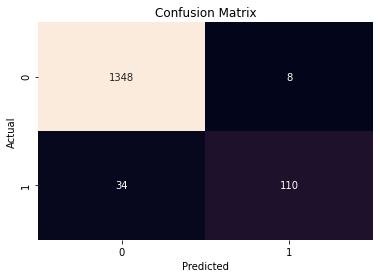

In [83]:
# Confusion matrix of SVM Model
print(draw_cm(np_Y_test, pred_svm_X_test.reshape(-1,1),))

In [84]:
# Classification report of SVM Model
print(classification_report(np_Y_test, pred_svm_X_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1356
           1       0.93      0.76      0.84       144

    accuracy                           0.97      1500
   macro avg       0.95      0.88      0.91      1500
weighted avg       0.97      0.97      0.97      1500



Inference:

> From SVM Model, the recall we could get was 76.3% with an accuracy of 99.6% for train data and 97.2% for test data.

> 1458 correct predictions and 42 incorrect predictions in total.





# Step 7: Comparison of models:

KNN: 0.958600 (0.008297)
DT: 0.983000 (0.003130)
NB: 0.924400 (0.005276)
RF: 0.988200 (0.003842)
SVM: 0.904000 (0.012522)


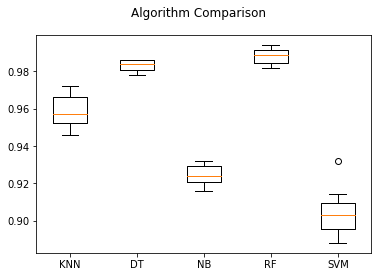

In [85]:
# Comparing our predictive models by KFold method
from sklearn import model_selection
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', svm.SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Observation:

> From the above plot, it seems Random Forest has the highest accuracy and hence Random Forest is the best predictive model for our dataset. 



In [86]:
Comparison=pd.DataFrame({'Classification Algorithm':['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','K-Nearest Neighbor','Support Vector Machine'],
'Train Accuracy (%)':[lr_train_acc_score*100, dt_train_acc_score*100, rf_train_acc_score*100, nb_train_acc_score*100, knn_train_acc_score*100, svm_train_acc_score*100],
'Test Accuracy (%)':[lr_test_acc_score*100, dt_test_acc_score*100, rf_test_acc_score*100, nb_test_acc_score*100, knn_test_acc_score*100, svm_test_acc_score*100],
'f1-score (%)':[lr_f1_score*100, dt_f1_score*100, rf_f1_score*100, nb_f1_score*100, knn_f1_score*100, svm_f1_score*100],
'Precision score (%)':[lr_precision_score*100,dt_precision_score*100,rf_precision_score*100,nb_precision_score*100,knn_precision_score*100,svm_precision_score*100],
'Recall score (%)':[lr_recall_score*100,dt_recall_score*100,rf_recall_score*100,nb_recall_score*100,knn_recall_score*100,svm_recall_score*100],
'ROC Area Under Curve (%)':[lr_roc_auc_score*100,dt_roc_auc_score*100,rf_roc_auc_score*100,nb_roc_auc_score*100,knn_roc_auc_score*100,svm_roc_auc_score*100]},
index=['Model 1','Model 2','Model 3','Model 4','Model 5','Model 6'])
Comparison

,Classification Algorithm,Train Accuracy (%),Test Accuracy (%),f1-score (%),Precision score (%),Recall score (%),ROC Area Under Curve (%)
Model 1,Logistic Regression,95.657143,95.333333,72.656250,83.035714,64.583333,81.591077
Model 2,Decision Tree,99.600000,97.800000,88.659794,87.755102,89.583333,94.127950
Model 3,Random Forest,99.514286,98.800000,93.430657,98.461538,88.888889,94.370698
Model 4,Naive Bayes,92.542857,92.800000,58.778626,65.254237,53.472222,75.224312
Model 5,K-Nearest Neighbor,99.514286,94.066667,57.004831,93.650794,40.972222,70.338618
Model 6,Support Vector Machine,99.657143,97.200000,83.969466,93.220339,76.388889,87.899459


For imbalanced dataset, Accuracy is not a good metrics to choose best model.

In this dataset we have to predict whether a customer will buy personal loan or not.

> So, predicting a customer who is buying personal loan as will not buy personal loan results in a greater cost to the bank than predicting a customer who will not buy personal loan as buying customer.

Hence, the model that has least False Negative (FN) value is the best model for our dataset.

Comparing all the predicted models, we found that Random Forest model has:least FN value and also has just 17 incorrect predictions. Thus, for our dataset, **Random Forest is the best model.**

# Step 8: Business understanding of our model

> 1) First we have imported all the required libraries such as numpy, pandas, matplotlib, seaborn etc.

> 2) We have imported the dataset Bank_Personal_loan_Modeling.csv from google drive

> 3) We analysed the datatypes, statistical summary, null values, shape of the dataset.

*   In our dataset, Target variable is Personal_Loan which describe whether the person has taken loan or not and other features are independent variables.

> 4) As the dataset contains 5000 rows and 14 columns, we cleaned the dataset by dropping irrelevant columns.

*   We found that ID column does not contain any information, so we dropped ID column
*   From correlation matrix we found that Age and Experience are highly correlated. Hence, we dropped Experience column as it also contained some faulty data.

> 5) Then we did Exploratory Data Analysis (EDA), which helped us to breakdown the whole dataset into smaller experiments and so we easily understood the relationship between all the features.

*   By displaying unique elements in each column, we found that ZIP_Code has 467 distinct values as it a nominal categorical variable. Hence, we dropped ZIP_Code column from the dataset.
*   We found number of people with zero mortgage and zero credit card spending per month.

*   Found value counts of all categorical columns
*   As the best part of EDA, we did univariate and multivariate analysis to analyze the relationship between target variable and all other independent variables.

> 6) Divided the dataset as X and Y where X for all independent variables and Y for target variable.

>From EDA analysis we found that Income, CCAvg and Mortgage columns are highly skewed. Hence, we have used Power Transformation method to reduce skewness of Income & CCAvg columns and Binning method for Mortgage column and have saved it in Mortgage_Int variable and thus dropped Mortgage column.

> 7) Then we splitted the dataset 70 % train data and 30 % test data using stratified sampling as X_train, X_test,Y_train, Y_test.

> 8) We normalised both train and test data of target variables and all independent variables using sklearn's Standard Scalar. Then, these dataframes of test and train data are converted to numpy arrays.

> Then, we build Logistic Regression and some other classification algorithms to find the best model to predict our target variable.

> 9) We build Logistic Regression Model, fit it on X_train and predict on X_test.

> We measured all the metrics related for evaluating the model performance such as accuracy score, f1-score, confusion matrix, classification report, roc score.

Similarly, we build other classification algorithms like Decision Tree, Random Forest, Naive Bayes, KNN, SVM and have compared their performance to find the best model to predict our target variable. 





















**Predictive Model 1 - Logistic Regression Model:**
> Train Accuracy: 95.6 %

> Test Accuracy: 95.3 %

> f1-score: 72.6 %

> Precision score: 83 %

> Recall score: 64.5 %

> ROC Area under curve: 81.5 %



>From classification matrix, TN=1337, FP=19, FN=51, TP=93

**Predictive Model 2 - Decision Tree Classifier:**
> Train Accuracy: 95.6 %

> Test Accuracy: 95.3 %

> f1-score: 72.6 %

> Precision score: 83 %

> Recall score: 64.5 %

> ROC Area under curve: 81.5 %

>From classification matrix, TN=1337, FP=19, FN=51, TP=93

**Predictive Model 3 - Random Forest Classifier:**
> Train Accuracy: 95.6 %

> Test Accuracy: 95.3 %

> f1-score: 72.6 %

> Precision score: 83 %

> Recall score: 64.5 %

> ROC Area under curve: 81.5 %

>From classification matrix, TN=1337, FP=19, FN=51, TP=93

**Predictive Model 4 - Naive Bayes Classifier:**
> Train Accuracy: 95.6 %

> Test Accuracy: 95.3 %

> f1-score: 72.6 %

> Precision score: 83 %

> Recall score: 64.5 %

> ROC Area under curve: 81.5 %

>From classification matrix, TN=1337, FP=19, FN=51, TP=93

**Predictive Model 5 - K Nearest Neighbor Classifier:**
> Train Accuracy: 95.6 %

> Test Accuracy: 95.3 %

> f1-score: 72.6 %

> Precision score: 83 %

> Recall score: 64.5 %

> ROC Area under curve: 81.5 %

>From classification matrix, TN=1337, FP=19, FN=51, TP=93


**Predictive Model 6 - Support Vector Machine:**
> Train Accuracy: 95.6 %

> Test Accuracy: 95.3 %

> f1-score: 72.6 %

> Precision score: 83 %

> Recall score: 64.5 %

> ROC Area under curve: 81.5 %

>From classification matrix, TN=1337, FP=19, FN=51, TP=93

By observing all the metrics used for evaluating performance of these predictive models, we can conclude that **Random Forest Classifier** is the best predictive model for our dataset as it has the following characteristics:

*   Least FN value
*   Just 18 incorrect predictions of our dataset (from confusion matrix)

*   Higher precision score, recall score, accuracy

*   Higher Receiver Operating Characteristic (ROC) Area Under Curve (AUC) score
























Important information gathered to increase the success rate of future campaigns are:


> Customers of age between 30 and 60 are more likely to take personal loan.

> Families with size of 3 are more likely to take personal loan.

> Customers whose income is higher than $100 are more likely to take personal loan. 

> Customers with higher mortgage value (more than $400) are more likely to take personal loan.

> Customers whose eduaction level is 1 (undergrad) are more likely to take personal loan than graduates and Advanced/Professional 














